In [2]:
from PyEIS import *

## Frequency range
The first first step needed to simulate an electrochemical impedance spectra is to generate a frequency domain, to do so, use to build-in freq_gen() function, as follows

In [5]:
f_range = freq_gen(f_start=10**10, f_stop=0.1, pts_decade=7)
# print(f_range[0]) #First 5 points in the freq. array
print()
# print(f_range[1]) #First 5 points in the angular freq.array

Note that all functions included are described, to access these descriptions stay within () and press shift+tab. The freq_gen(), returns both the frequency, which is log seperated based on points/decade between f_start to f_stop, and the angular frequency. This function is quite useful and will be used through this tutorial

## The Equivalent Circuits
There exist a number of equivalent circuits that can be simulated and fitted, these functions are made as definations and can be called at any time. To find these, write: "cir_" and hit tab. All functions are outline in the next cell and can also be viewed in the equivalent circuit overview:

In [3]:
cir_RC
cir_RQ
cir_RsRQ
cir_RsRQRQ
cir_Randles
cir_Randles_simplified
cir_C_RC_C
cir_Q_RQ_Q
cir_RCRCZD
cir_RsTLsQ
cir_RsRQTLsQ
cir_RsTLs
cir_RsRQTLs
cir_RsTLQ
cir_RsRQTLQ
cir_RsTL
cir_RsRQTL
cir_RsTL_1Dsolid
cir_RsRQTL_1Dsolid

<function PyEIS.PyEIS.cir_RsRQTL_1Dsolid(w, L, D, radius, Rs, R1, fs1, n1, R2, Q2, n2, R_w, n_w, Rel, Ri, Q1='none')>

## Simulation of -(RC)-

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/RC_circuit.png' width="300" />

#### Input Parameters:
- w = Angular frequency [1/s]
- R = Resistance [Ohm]
- C = Capacitance [F]
- fs = summit frequency of RC circuit [Hz]

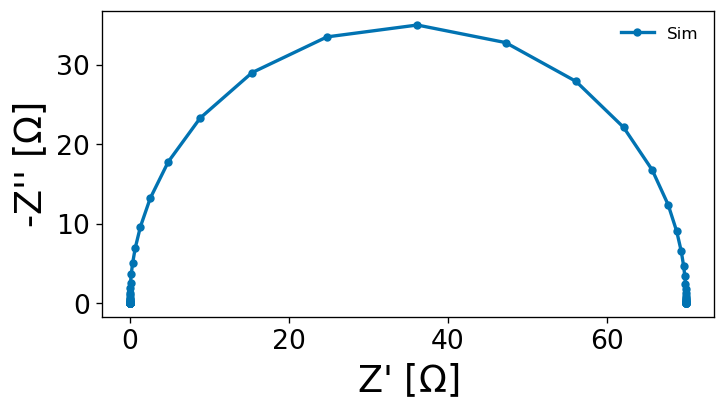

In [6]:
RC_example = EIS_sim(frange=f_range[0], circuit=cir_RC(w=f_range[1], R=70, C=10**-6), legend='on')

## Simulation of -Rs-(RQ)-

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/RsRQ_circuit.png' width="500" />

#### Input parameters:
- w = Angular frequency [1/s]
- Rs = Series resistance [Ohm]
- R = Resistance [Ohm]
- Q = Constant phase element [s^n/ohm]
- n = Constant phase elelment exponent [-]
- fs = summit frequency of RQ circuit [Hz]

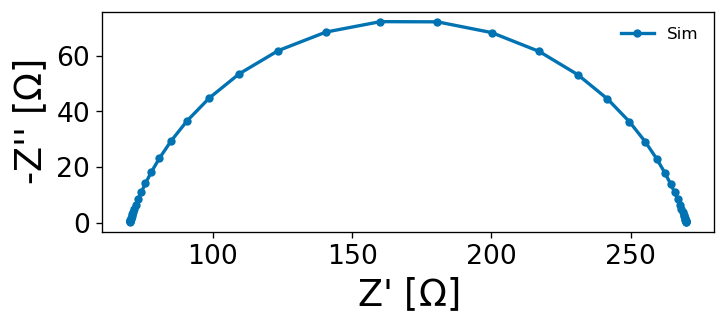

In [148]:
RsRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQ(w=f_range[1], Rs=70, R=200, n=.8, Q=10**-5), legend='on')

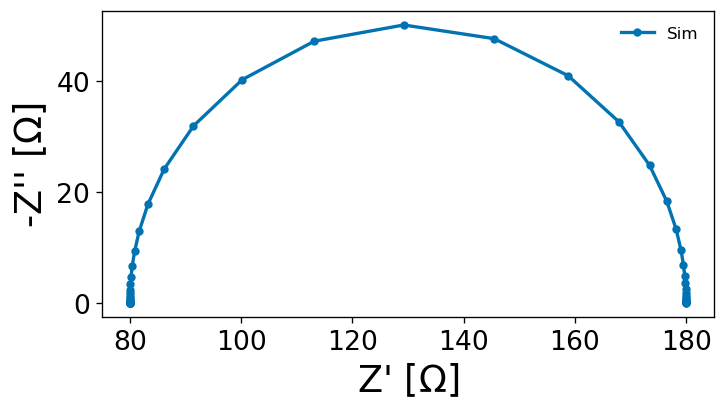

In [149]:
RsRC_example = EIS_sim(frange=f_range[0], circuit=cir_RsRC(w=f_range[1], Rs=80, R=100, C=10**-5), legend='on')

## Simulation of -Rs-(RQ)-(RQ)-

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/RsRQRQ_circuit.png' width="500" />

#### Input parameters:
- w = Angular frequency [1/s]
- Rs = Series Resistance [Ohm]
- R = Resistance [Ohm]
- Q = Constant phase element [s^n/ohm]
- n = Constant phase element exponent [-]
- fs = summit frequency of RQ circuit [Hz]
- R2 = Resistance [Ohm]
- Q2 = Constant phase element [s^n/ohm]
- n2 = Constant phase element exponent [-]
- fs2 = summit frequency of RQ circuit [Hz]

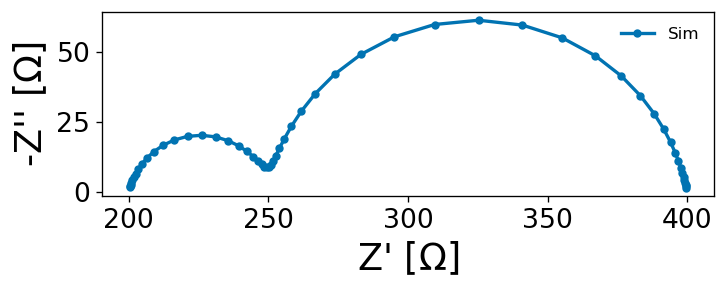

In [8]:
RsRQRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQRQ(w=f_range[1], Rs=200, R=150, n=.872, Q=10**-4, R2=50, n2=.853, Q2=10**-6), legend='on')

## Simulation of -Rs-(Q(RW))- (Randles-circuit)
This circuit is often used for an experimental setup with a macrodisk working electrode with an outer-sphere heterogeneous charge transfer. This, classical, warburg element is controlled by semi-infinite linear diffusion, which is given by the geometry of the working electrode. Two Randles functions are avaliable for simulations: cir_Randles_simplified() and cir_Randles(). The former contains the Warburg constant (sigma), which summs up all mass transport constants (Dox/Dred, Cred/Cox, number of electrons (n_electron), Faradays constant (F), T, and E0) into a single constant sigma, while the latter contains all of these constants. Only cir_Randles_simplified() is avaliable for fitting, as either D$_{ox}$ or D$_{red}$ and C$_{red}$ or C$_{ox}$ are needed.

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/Randles_circuit.png' width="500" />

#### Input parameters:
- Rs = Series resistance [ohm]
- Rct = charge-transfer resistance [ohm]
- Q = Constant phase element used to model the double-layer capacitance [F]
- n = expononent of the CPE [-]
- sigma = Warburg Constant [ohm/s^1/2]

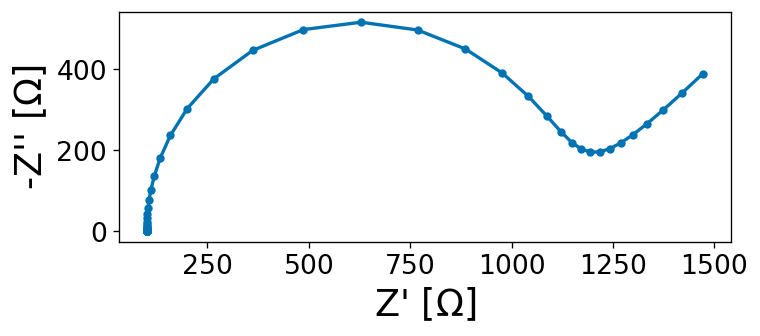

In [9]:
Randles = cir_Randles_simplified(w=f_range[1], Rs=100, R=1000, n=1, sigma=300, Q=10**-5)
Randles_example = EIS_sim(frange=f_range[0], circuit=Randles, legend='off')

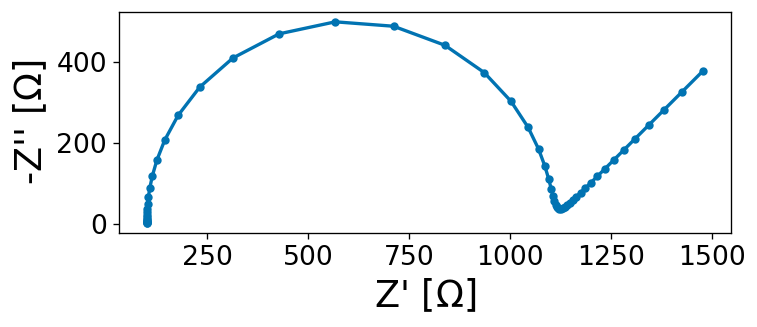

In [10]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles_simplified(w=f_range[1], Rs=100, R=1000, n=1, sigma=300, Q='none', fs=10**3.3), legend='off')

In the following, the Randles circuit with the Warburg constant (sigma) defined is simulated where:
- D$_{red}$/D$_{ox}$ = 10$^{-6}$ cm$^2$/s
- C$_{red}$/C$_{ox}$ = 10 mM
- n_electron = 1
- T = 25 $^o$C

This function is a great tool to simulate expected impedance responses prior to starting experiments as it allows for evaluation of concentrations, diffusion constants, number of electrons, and Temp. to evaluate the feasability of obtaining information on either kinetics, mass-transport, or both.

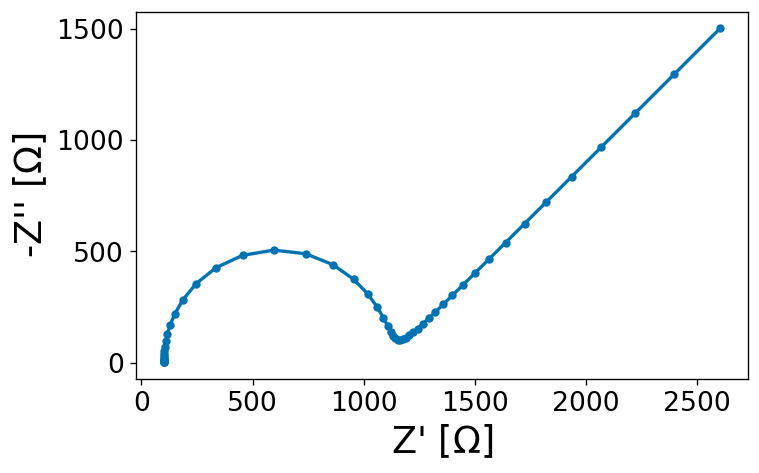

In [12]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles(w=f_range[1], Rs=100, Rct=1000, Q=10**-7, n=1, T=298.15, D_ox=10**-9, D_red=10**-9, C_ox=10**-5, C_red=10**-5, n_electron=1, E=0, A=1), legend='off')